In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [ ]:
TS_CSV = './538_imagick_r_ts.csv'
CONFIG_CSV='./538_imagick_r_regret_out.csv'

In [ ]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,3960832.0,4046848.0,12402688.0,6631424.0,14225408.0,5742592.0,6791168.0,8339456.0,6578176.0,...,3866624.0,3866624.0,8237056.0,4083712.0,8216576.0,8183808.0,4067328.0,3973120.0,4128768.0,7860224.0
1,1,335355904.0,342138880.0,396148736.0,343355392.0,389832704.0,334553088.0,344580096.0,365056000.0,320811008.0,...,331390976.0,321093632.0,331972608.0,322117632.0,353288192.0,394563584.0,331096064.0,321785856.0,338882560.0,366440448.0
2,2,434909184.0,425136128.0,479010816.0,427520000.0,501153792.0,431190016.0,415686656.0,466624512.0,414175232.0,...,413900800.0,413896704.0,437211136.0,415444992.0,461406208.0,467988480.0,414162944.0,414896128.0,441987072.0,458211328.0
3,3,434909184.0,425136128.0,479010816.0,427606016.0,501153792.0,431190016.0,415768576.0,466788352.0,414175232.0,...,413900800.0,413896704.0,437399552.0,415444992.0,461111296.0,466718720.0,413876224.0,414896128.0,441987072.0,458211328.0
4,4,434909184.0,425136128.0,479010816.0,427606016.0,501153792.0,431190016.0,415768576.0,466788352.0,414175232.0,...,413900800.0,413822976.0,437399552.0,415444992.0,461103104.0,466288640.0,413876224.0,414896128.0,441987072.0,458211328.0


In [6]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
0,False,True,17010,primary,10,10,16,auto,33892,542,13733743,percpu,False,False,default,False,-3.117373e+09
1,True,False,28975,primary,18,18,71,always,24277,218,33312906,percpu,True,True,always,True,2.112321e+10
2,True,True,8392,secondary,20,30,25,disabled,843,49,20929204,disabled,False,False,never,False,5.771424e+09
3,False,False,45646,disabled,3,6,41,auto,41720,394,1213783,phycpu,True,True,always,True,1.484108e+10
4,False,True,33830,disabled,7,15,32,disabled,10452,296,23490114,phycpu,False,True,default,True,-2.014085e+08


In [7]:
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
42,False,False,1203,primary,10,7,74,auto,70,20,18298208,disabled,True,False,default,False,-5.889888e+09
43,False,False,1192,disabled,10,4,75,auto,37,17,13854365,phycpu,True,False,never,False,-5.593977e+09
48,False,False,1097,primary,10,8,75,auto,44,33,18547350,disabled,True,False,default,False,-5.572284e+09
33,False,False,1304,disabled,6,6,74,auto,70,34,23401754,phycpu,True,False,default,False,-5.547704e+09
29,False,False,546,primary,10,16,73,disabled,70,15,30229841,disabled,False,False,default,True,-5.535547e+09


In [8]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_43', 'run_44', 'run_49']

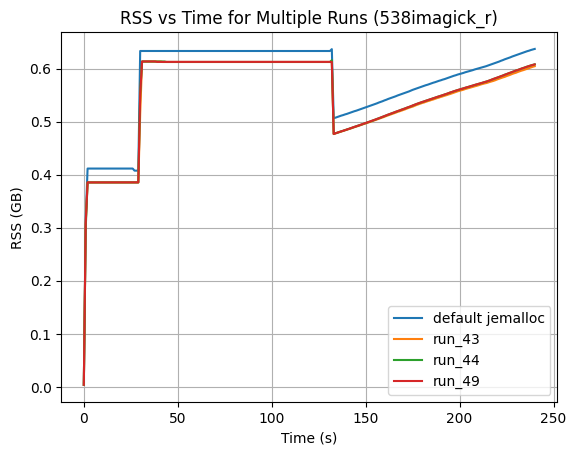

In [12]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default / (1024*1024*1024), label='default jemalloc')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column] / (1024*1024*1024), label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()

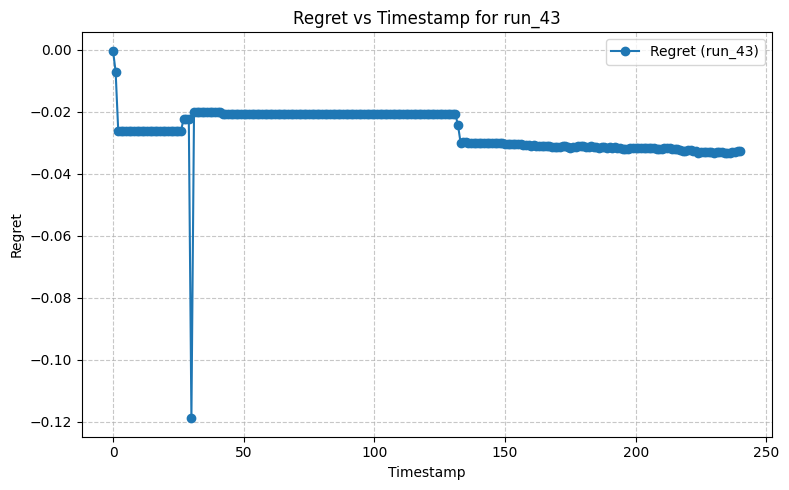

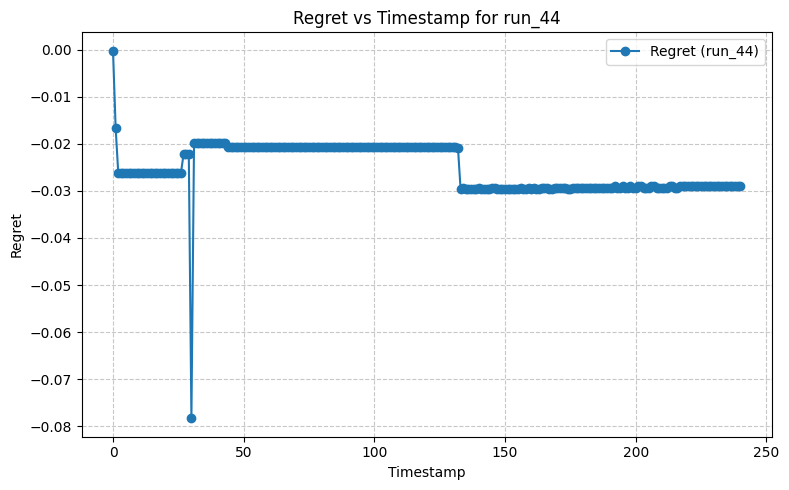

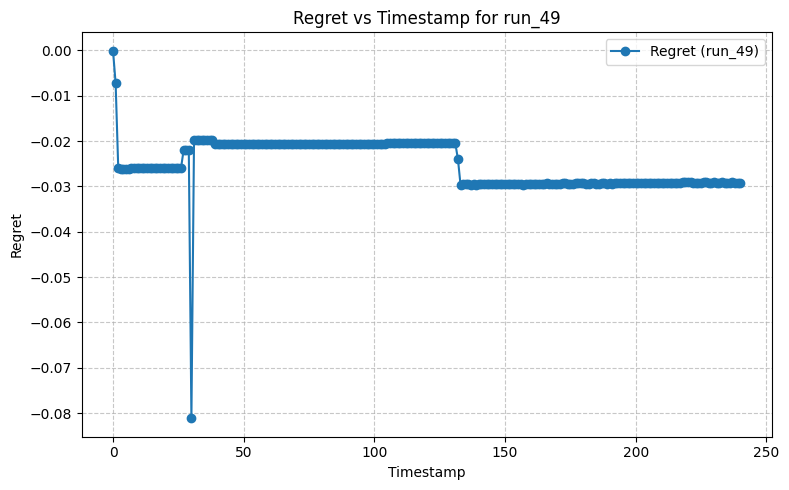

In [12]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  (df[column] - df['run_default_jemalloc']) / (1024**3)
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Timestamp for {column}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [3]:
TIMESERIES_FILE = './538_imagick_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


EmptyDataError: No columns to parse from file